In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, minmax_scale
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

import warnings
warnings.filterwarnings('ignore')

In [2]:
## read the data set

df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [4]:
df.shape

(1470, 35)

In [5]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [6]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [8]:
cat_fields = (df.select_dtypes('object')).columns
cat_fields

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

In [9]:
num_fields = df.columns.difference(cat_fields)
num_fields

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [10]:
df[num_fields]

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,1,1,2,94,3,2,...,1,80,0,8,0,1,6,4,0,5
1,49,279,8,1,1,2,3,61,2,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1373,2,2,1,4,4,92,2,1,...,2,80,0,7,3,3,0,0,0,0
3,33,1392,3,4,1,5,4,56,3,1,...,3,80,0,8,3,3,8,7,3,0
4,27,591,2,1,1,7,1,40,3,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,1,2061,3,41,4,2,...,3,80,1,17,3,3,5,2,0,3
1466,39,613,6,1,1,2062,4,42,2,3,...,1,80,1,9,5,3,7,7,1,7
1467,27,155,4,3,1,2064,2,87,4,2,...,2,80,1,6,0,3,6,2,0,3
1468,49,1023,2,3,1,2065,4,63,2,2,...,4,80,0,17,3,2,9,6,0,8


 -------------- Age -------
<bound method IndexOpsMixin.value_counts of 0       41
1       49
2       37
3       33
4       27
        ..
1465    36
1466    39
1467    27
1468    49
1469    34
Name: Age, Length: 1470, dtype: int64>


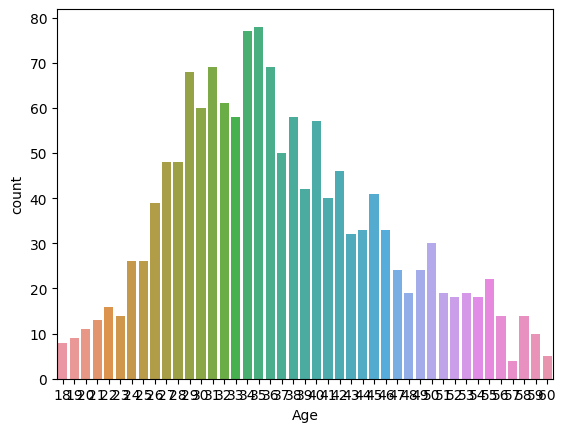

 -------------- DailyRate -------
<bound method IndexOpsMixin.value_counts of 0       1102
1        279
2       1373
3       1392
4        591
        ... 
1465     884
1466     613
1467     155
1468    1023
1469     628
Name: DailyRate, Length: 1470, dtype: int64>


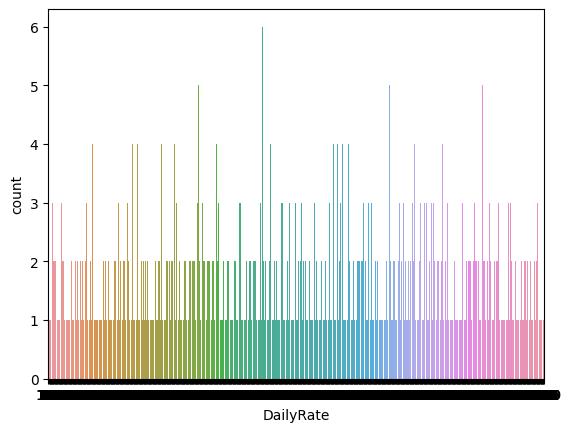

 -------------- DistanceFromHome -------
<bound method IndexOpsMixin.value_counts of 0        1
1        8
2        2
3        3
4        2
        ..
1465    23
1466     6
1467     4
1468     2
1469     8
Name: DistanceFromHome, Length: 1470, dtype: int64>


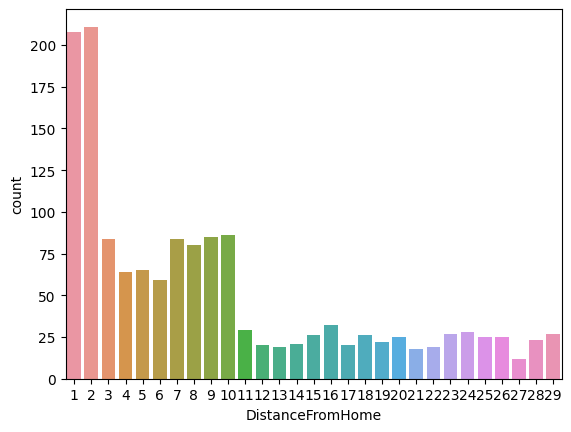

 -------------- Education -------
<bound method IndexOpsMixin.value_counts of 0       2
1       1
2       2
3       4
4       1
       ..
1465    2
1466    1
1467    3
1468    3
1469    3
Name: Education, Length: 1470, dtype: int64>


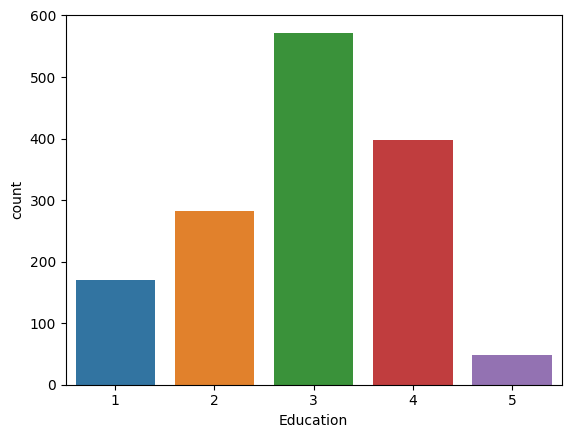

 -------------- EmployeeCount -------
<bound method IndexOpsMixin.value_counts of 0       1
1       1
2       1
3       1
4       1
       ..
1465    1
1466    1
1467    1
1468    1
1469    1
Name: EmployeeCount, Length: 1470, dtype: int64>


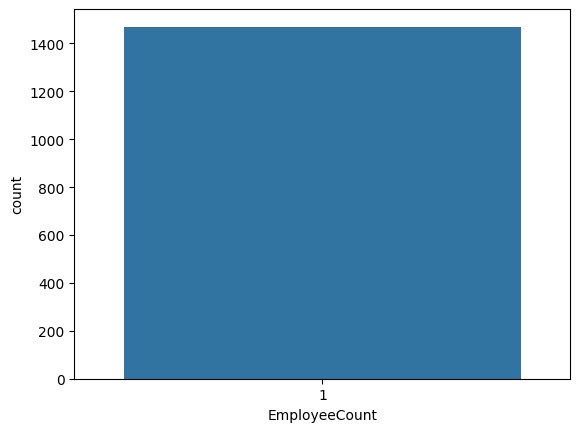

 -------------- EmployeeNumber -------
<bound method IndexOpsMixin.value_counts of 0          1
1          2
2          4
3          5
4          7
        ... 
1465    2061
1466    2062
1467    2064
1468    2065
1469    2068
Name: EmployeeNumber, Length: 1470, dtype: int64>


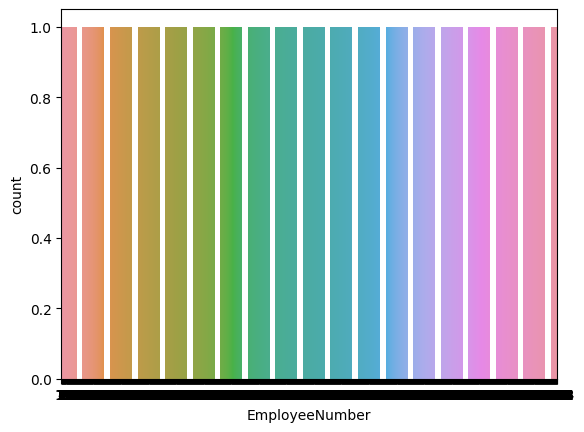

 -------------- EnvironmentSatisfaction -------
<bound method IndexOpsMixin.value_counts of 0       2
1       3
2       4
3       4
4       1
       ..
1465    3
1466    4
1467    2
1468    4
1469    2
Name: EnvironmentSatisfaction, Length: 1470, dtype: int64>


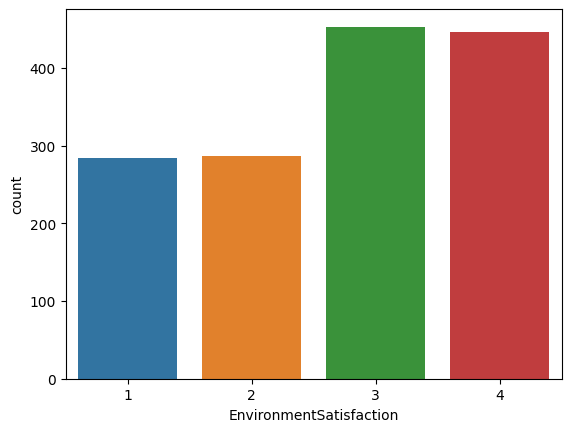

 -------------- HourlyRate -------
<bound method IndexOpsMixin.value_counts of 0       94
1       61
2       92
3       56
4       40
        ..
1465    41
1466    42
1467    87
1468    63
1469    82
Name: HourlyRate, Length: 1470, dtype: int64>


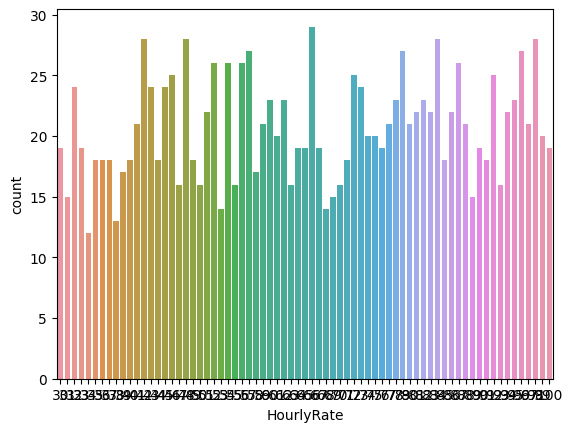

 -------------- JobInvolvement -------
<bound method IndexOpsMixin.value_counts of 0       3
1       2
2       2
3       3
4       3
       ..
1465    4
1466    2
1467    4
1468    2
1469    4
Name: JobInvolvement, Length: 1470, dtype: int64>


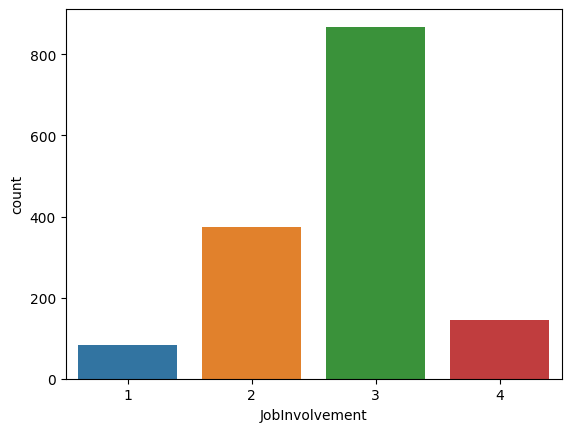

 -------------- JobLevel -------
<bound method IndexOpsMixin.value_counts of 0       2
1       2
2       1
3       1
4       1
       ..
1465    2
1466    3
1467    2
1468    2
1469    2
Name: JobLevel, Length: 1470, dtype: int64>


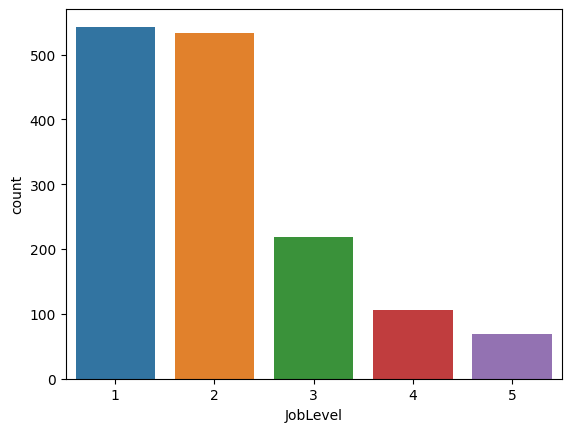

 -------------- JobSatisfaction -------
<bound method IndexOpsMixin.value_counts of 0       4
1       2
2       3
3       3
4       2
       ..
1465    4
1466    1
1467    2
1468    2
1469    3
Name: JobSatisfaction, Length: 1470, dtype: int64>


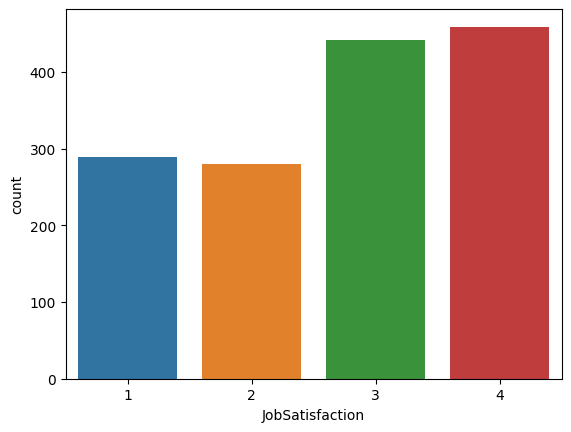

 -------------- MonthlyIncome -------
<bound method IndexOpsMixin.value_counts of 0       5993
1       5130
2       2090
3       2909
4       3468
        ... 
1465    2571
1466    9991
1467    6142
1468    5390
1469    4404
Name: MonthlyIncome, Length: 1470, dtype: int64>


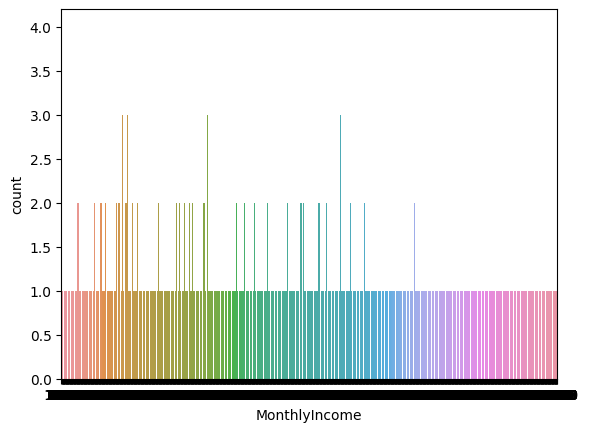

 -------------- MonthlyRate -------
<bound method IndexOpsMixin.value_counts of 0       19479
1       24907
2        2396
3       23159
4       16632
        ...  
1465    12290
1466    21457
1467     5174
1468    13243
1469    10228
Name: MonthlyRate, Length: 1470, dtype: int64>


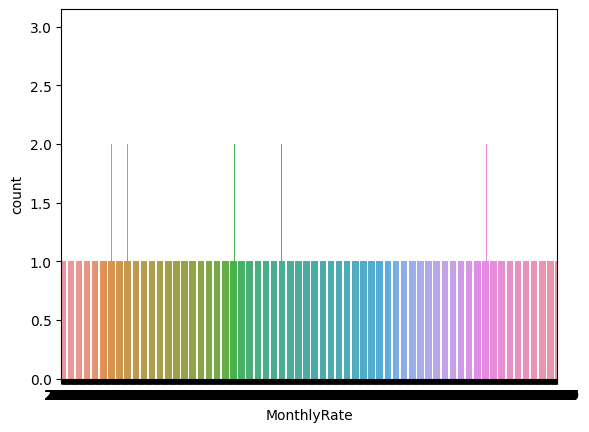

 -------------- NumCompaniesWorked -------
<bound method IndexOpsMixin.value_counts of 0       8
1       1
2       6
3       1
4       9
       ..
1465    4
1466    4
1467    1
1468    2
1469    2
Name: NumCompaniesWorked, Length: 1470, dtype: int64>


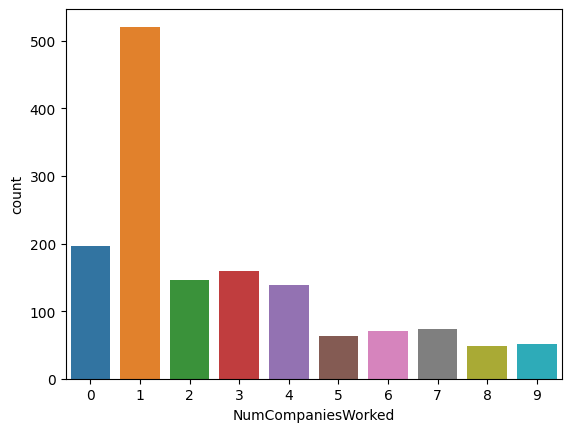

 -------------- PercentSalaryHike -------
<bound method IndexOpsMixin.value_counts of 0       11
1       23
2       15
3       11
4       12
        ..
1465    17
1466    15
1467    20
1468    14
1469    12
Name: PercentSalaryHike, Length: 1470, dtype: int64>


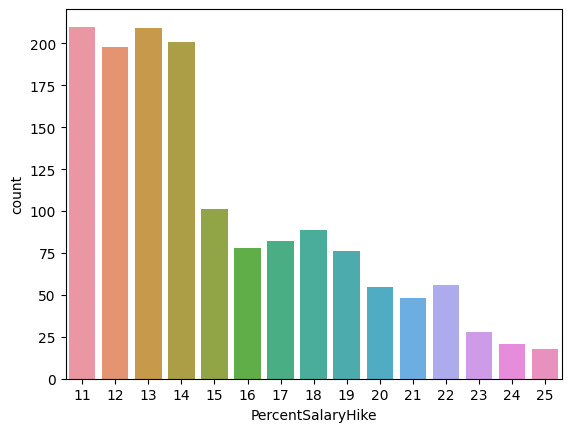

 -------------- PerformanceRating -------
<bound method IndexOpsMixin.value_counts of 0       3
1       4
2       3
3       3
4       3
       ..
1465    3
1466    3
1467    4
1468    3
1469    3
Name: PerformanceRating, Length: 1470, dtype: int64>


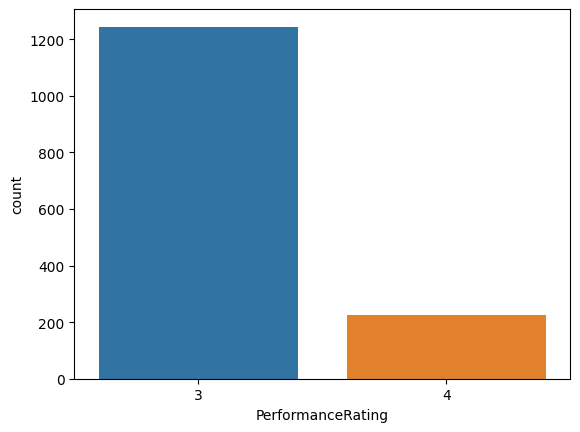

 -------------- RelationshipSatisfaction -------
<bound method IndexOpsMixin.value_counts of 0       1
1       4
2       2
3       3
4       4
       ..
1465    3
1466    1
1467    2
1468    4
1469    1
Name: RelationshipSatisfaction, Length: 1470, dtype: int64>


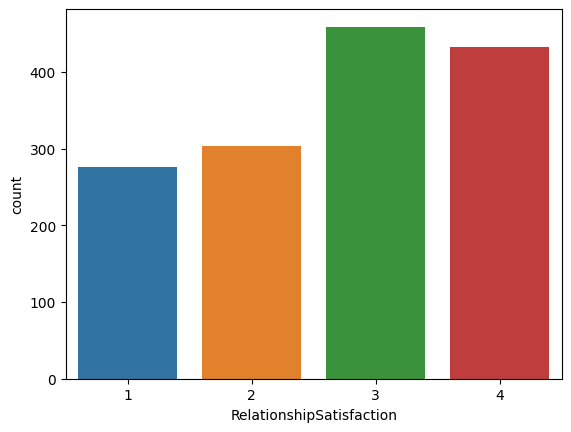

 -------------- StandardHours -------
<bound method IndexOpsMixin.value_counts of 0       80
1       80
2       80
3       80
4       80
        ..
1465    80
1466    80
1467    80
1468    80
1469    80
Name: StandardHours, Length: 1470, dtype: int64>


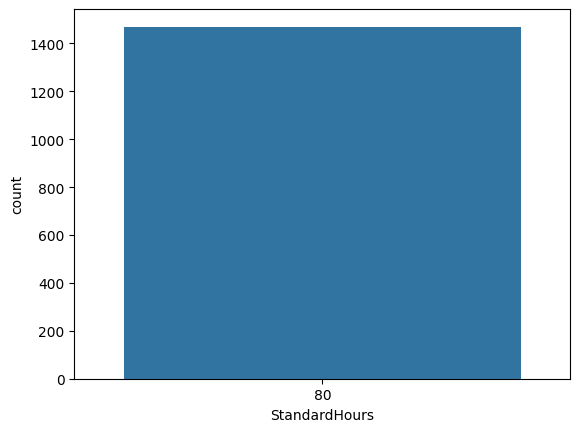

 -------------- StockOptionLevel -------
<bound method IndexOpsMixin.value_counts of 0       0
1       1
2       0
3       0
4       1
       ..
1465    1
1466    1
1467    1
1468    0
1469    0
Name: StockOptionLevel, Length: 1470, dtype: int64>


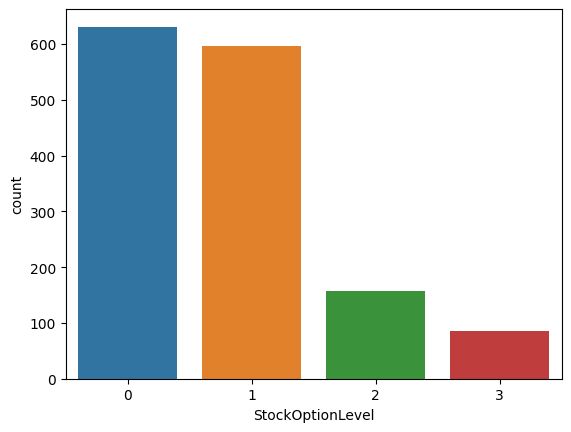

 -------------- TotalWorkingYears -------
<bound method IndexOpsMixin.value_counts of 0        8
1       10
2        7
3        8
4        6
        ..
1465    17
1466     9
1467     6
1468    17
1469     6
Name: TotalWorkingYears, Length: 1470, dtype: int64>


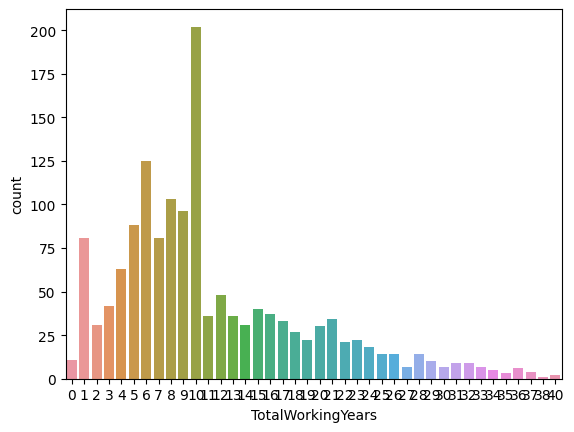

 -------------- TrainingTimesLastYear -------
<bound method IndexOpsMixin.value_counts of 0       0
1       3
2       3
3       3
4       3
       ..
1465    3
1466    5
1467    0
1468    3
1469    3
Name: TrainingTimesLastYear, Length: 1470, dtype: int64>


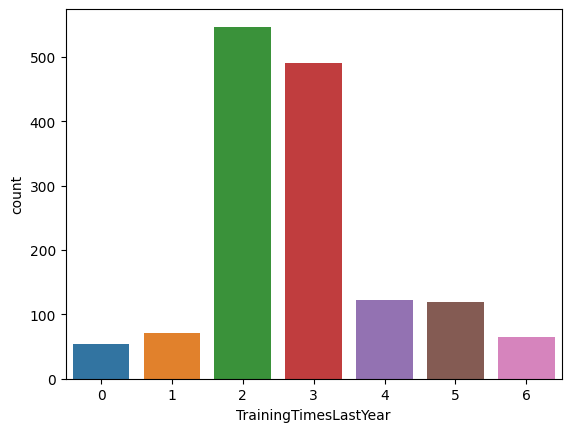

 -------------- WorkLifeBalance -------
<bound method IndexOpsMixin.value_counts of 0       1
1       3
2       3
3       3
4       3
       ..
1465    3
1466    3
1467    3
1468    2
1469    4
Name: WorkLifeBalance, Length: 1470, dtype: int64>


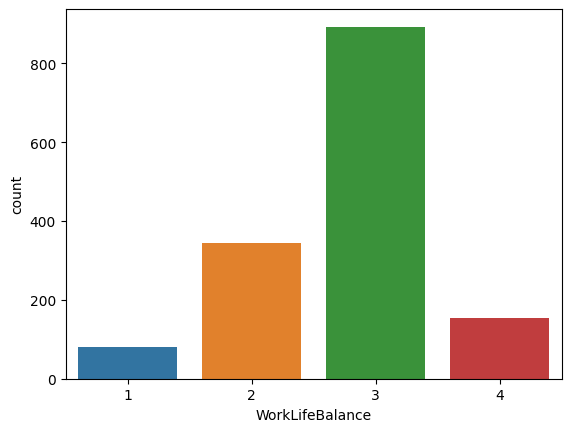

 -------------- YearsAtCompany -------
<bound method IndexOpsMixin.value_counts of 0        6
1       10
2        0
3        8
4        2
        ..
1465     5
1466     7
1467     6
1468     9
1469     4
Name: YearsAtCompany, Length: 1470, dtype: int64>


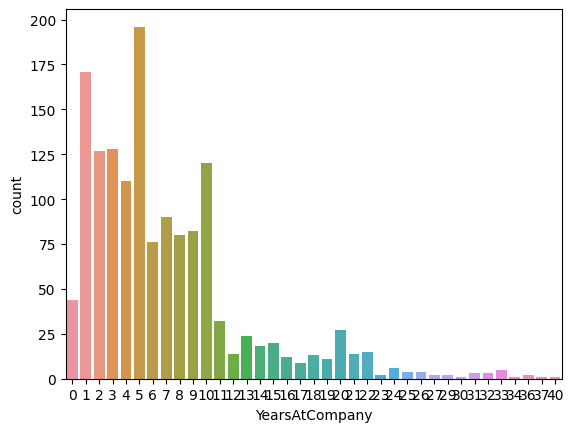

 -------------- YearsInCurrentRole -------
<bound method IndexOpsMixin.value_counts of 0       4
1       7
2       0
3       7
4       2
       ..
1465    2
1466    7
1467    2
1468    6
1469    3
Name: YearsInCurrentRole, Length: 1470, dtype: int64>


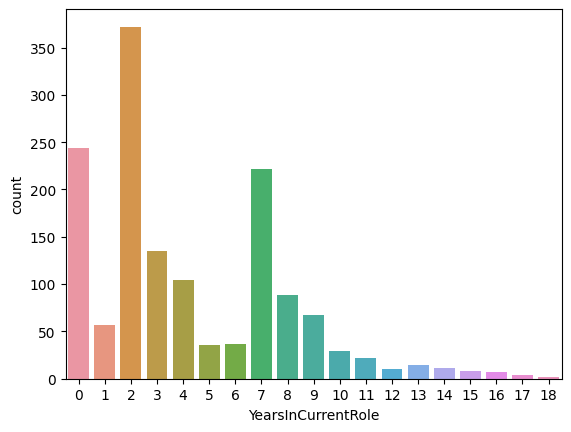

 -------------- YearsSinceLastPromotion -------
<bound method IndexOpsMixin.value_counts of 0       0
1       1
2       0
3       3
4       2
       ..
1465    0
1466    1
1467    0
1468    0
1469    1
Name: YearsSinceLastPromotion, Length: 1470, dtype: int64>


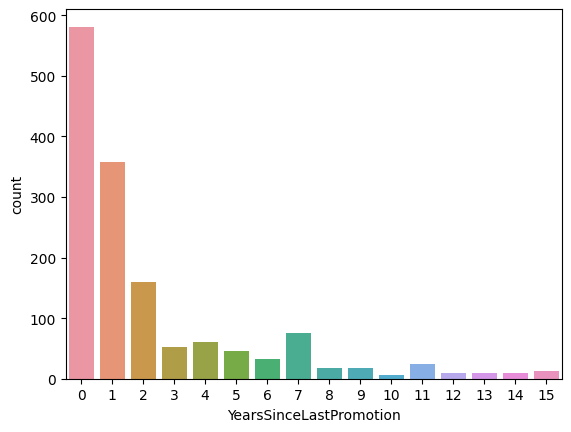

 -------------- YearsWithCurrManager -------
<bound method IndexOpsMixin.value_counts of 0       5
1       7
2       0
3       0
4       2
       ..
1465    3
1466    7
1467    3
1468    8
1469    2
Name: YearsWithCurrManager, Length: 1470, dtype: int64>


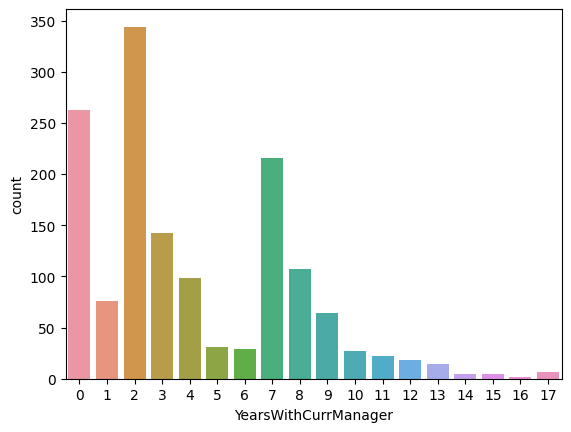

In [16]:
for col in df[num_fields]:
    print(f' -------------- {col} -------')
    print(df[col].value_counts)
    sns.countplot(data=df, x=col)
    plt.show()

In [22]:
df_cat1 = df[cat_fields]
df_cat1.drop('Attrition', axis=1, inplace=True)

In [23]:
df_cat1 = pd.get_dummies(df_cat, drop_first=True)
df_cat1

,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,0,1,0,1,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1
1,1,0,1,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
2,0,1,1,0,0,0,0,1,0,1,...,1,0,0,0,0,0,0,0,1,1
3,1,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
4,0,1,1,0,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1,0,1,0,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
1466,0,1,1,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1467,0,1,1,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,1
1468,1,0,0,1,0,0,1,0,0,1,...,0,0,0,0,0,1,0,1,0,0


In [37]:
## Getting fields having single unique value : will drop them \
single_value = []
for col in num_fields:
    if(df[col].nunique() == 1):
        single_value.append(col)
single_value

df.drop(single_value, axis=1, inplace=True)

In [40]:
cat_fields2 = []
num_fields = num_fields.difference(single_value)
for col in num_fields:
    if(df[col].nunique() < 10):
        cat_fields2.append(col)
cat_fields2

['Education',
 'EnvironmentSatisfaction',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TrainingTimesLastYear',
 'WorkLifeBalance']

In [ ]:
## Applying Label encoding